In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [4]:
dataset=pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.shape

(1338, 7)

In [7]:
types = dataset.dtypes
print(types)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
class_counts = dataset.groupby('sex').size()

print(class_counts)

sex
female    662
male      676
dtype: int64


In [10]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

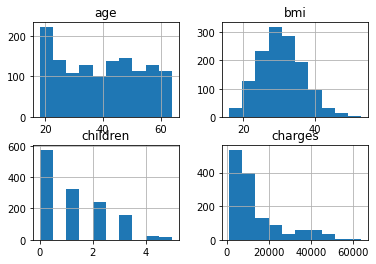

In [11]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

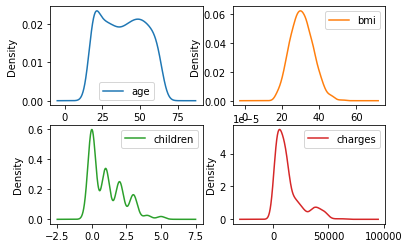

In [12]:
dataset.plot(kind='density' ,subplots=True, layout=(2,2), sharex=False)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


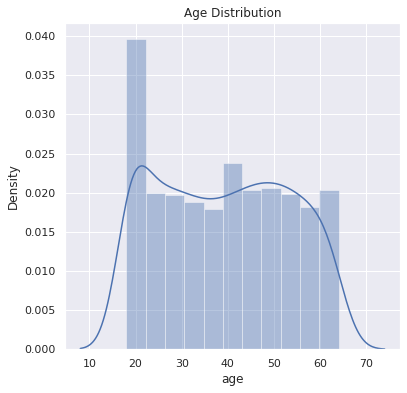

In [15]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

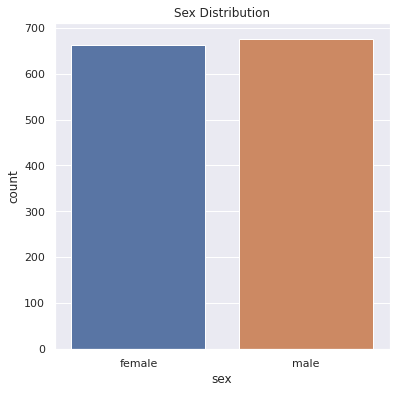

In [17]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=dataset)
plt.title('Sex Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


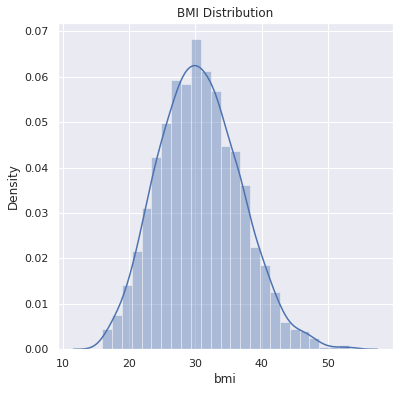

In [18]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

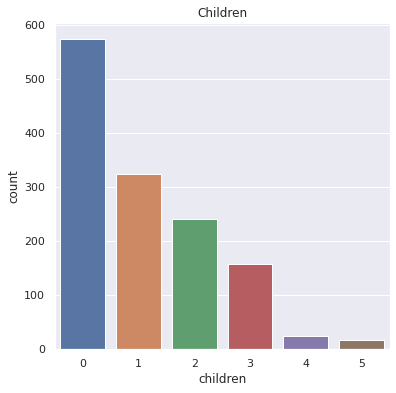

In [19]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=dataset)
plt.title('Children')
plt.show()

In [20]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

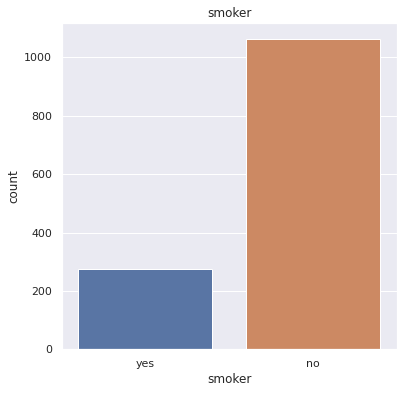

In [21]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=dataset)
plt.title('smoker')
plt.show()

In [22]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

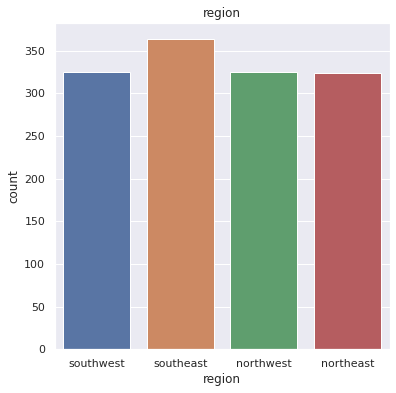

In [23]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=dataset)
plt.title('region')
plt.show()

In [24]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


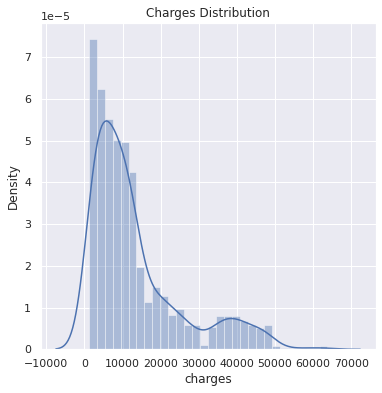

In [25]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [26]:
dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [27]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,0:6].values
# Extracting dependent variable:
y = dataset.iloc[:, 6].values

In [28]:
print(X)

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    3.  ]]


In [29]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [30]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [34]:
# loading the Linear Regression model
regressor = LinearRegression()

In [35]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [38]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [39]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [40]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [49]:
print("Regressor slope:  %2.f  "%( regressor.coef_[0]))
print("Regressor intercept:%2.f  "% regressor.intercept_)

Regressor slope:  251  
Regressor intercept:11358  


In [50]:
from sklearn import metrics
print("MAE %2.f" %(metrics.mean_absolute_error(y_test,y_pred)))

MAE 4267


In [51]:
from sklearn import metrics
print("RMSE %2.f" %(np.sqrt(metrics.mean_absolute_error(y_test,y_pred))))

RMSE 65


In [52]:
print('Train Score: %f' %(regressor.score(X_train, y_train))) 
print('Test Score: %f' % (regressor.score(X_test, y_test)) )

Train Score: 0.751506
Test Score: 0.744727


In [53]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(regressor) 
  
# Load the pickled model 
Dec_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Dec_from_pickle.predict(X_test) 

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [54]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(regressor,open('/content/drive/My Drive/project1.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [56]:
import joblib
filename = '/content/drive/My Drive/project1.sav'
joblib.dump(regressor, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7447273869684077


In [57]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/project1.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [59]:
!pip install streamlit

In [61]:
# Load the pickled model
import pickle
pickle_in = open("/content/drive/My Drive/project1.pkl","rb")
model=pickle.load(pickle_in)

In [115]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/project1.pkl","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/insurance.csv')


dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

X = dataset.iloc[:,0:6].values

def predict_note_authentication(age,sex,bmi,children,smoker,region):
  output= model.predict([[age,sex,bmi,children,smoker,region]])
  print("Medical Insurance Cost =", output)
  #prediction=("Medical Insurance Cost=",output)

  #print(prediction)
  x=output
  output=abs(x)
  return output
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Machine Learning Project</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Medical Insurance Cost Prediction")

    age=st.number_input('Insert Age',0,100)
    sex=st.number_input('Insert 0 For Male 1 For Female ',0,1)
    bmi=st.number_input('Insert a BMI',10.0,70.0)
    children=st.number_input('Insert childrens',0,6)
    smoker=st.number_input('Insert a Smoker 0 For No 1 For Yes',0,1)
    region=st.number_input('Insert a Region 0 For southeast, 1 For southwest, 2 For northeast, 3 For northwest ',0,3)

    
    resul=""
    if st.button("Predict"):
      result=predict_note_authentication(age,sex,bmi,children,smoker,region)
      st.success('Model has predicted Medical Insurance Cost= {}'.format(result))
    if st.button("About"):
      st.subheader("Developed by Priyanshu Jain")
      st.subheader("C-Section,PIET")

if __name__=='__main__':
  main()
   

Overwriting app.py


In [108]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [102]:
!pip install pyngrok

In [109]:
!ngrok authtoken 1rQ8XkYyUBK9R8KvW6wdVZD6HNI_44Zoypk4KP8df9VdpBAuQ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [113]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://5793-35-236-234-139.ngrok.io" -> "http://localhost:80">

In [114]:
 !streamlit run --server.port 80 app.py

t=2021-09-04T06:18:09+0000 lvl=warn msg="failed to open private leg" id=03e00ece6c27 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2021-09-04T06:18:09+0000 lvl=warn msg="failed to open private leg" id=3e9f047268e2 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.236.234.139:80

Medical Insurance Cost = [14664.13245823]
  Stopping...
